In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
import scipy.stats
from scipy import optimize
from astroML import stats as astroMLstats

from astropy.visualization.hist import hist as fancyhist

In [2]:
N = 10000
spin = uniform(0, 1).rvs(N)
M = norm(1, 0.02).rvs(N)

M_irr = M * np.sqrt((1 + np.sqrt(1-spin**2))/2)

f = np.sqrt((1 + np.sqrt(1-spin**2))/2)

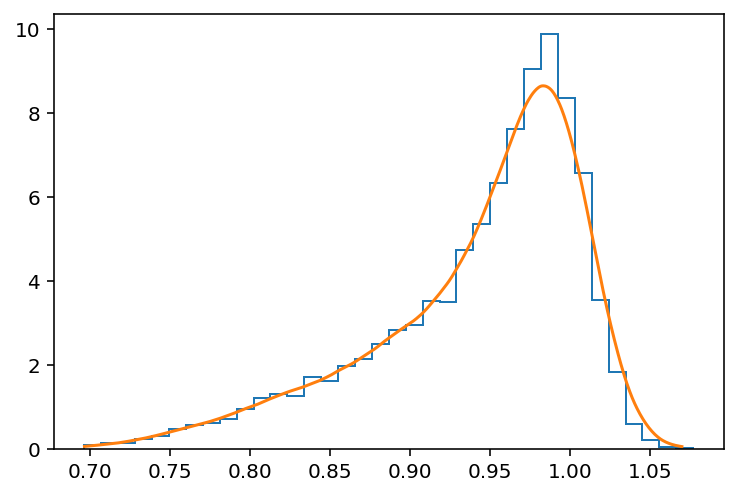

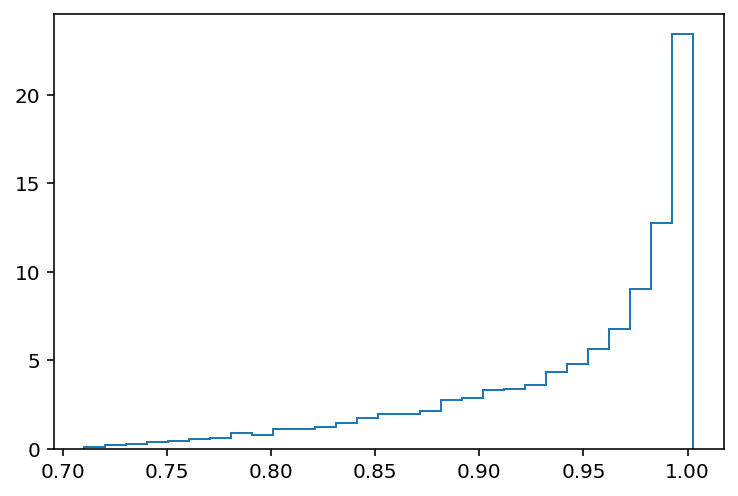

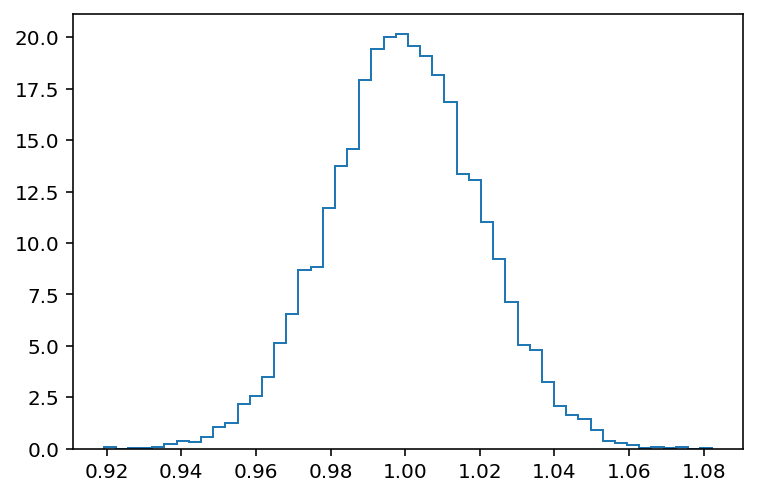

In [10]:
from sklearn.neighbors import KernelDensity
xgrid = np.linspace(M_irr.min(),M_irr.max(),1000)  # Use this instead of 'x' for plotting

def kde_sklearn(data, bandwidth, kernel):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

PDFgaussian = kde_sklearn(M_irr,bandwidth=0.03,kernel="gaussian") 
PDFepanechnikov = kde_sklearn(M_irr,bandwidth=0.03,kernel="epanechnikov") 

counts, bins, bars = fancyhist(M_irr, bins="scott", histtype="step",density=True)

plt.plot(xgrid,PDFepanechnikov)

plt.show()

counts_f, bins_f, bars_f = fancyhist(f, bins="scott", histtype="step",density=True)

plt.show()

counts_M, bins_M, bars_M = fancyhist(M, bins="scott", histtype="step",density=True)

plt.show()

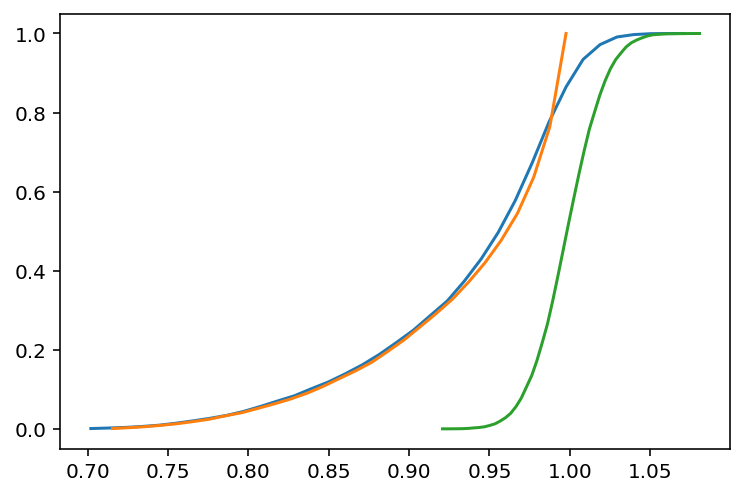

In [11]:
cdf_norm = np.cumsum(counts) / np.sum(counts)
x_data = (bins[1:] + bins[:-1]) / 2
plt.plot(x_data, cdf_norm)

cdf_norm_f = np.cumsum(counts_f) / np.sum(counts_f)
x_data_f = (bins_f[1:] + bins_f[:-1]) / 2
plt.plot(x_data_f, cdf_norm_f)

cdf_norm_M = np.cumsum(counts_M) / np.sum(counts_M)
x_data_M = (bins_M[1:] + bins_M[:-1]) / 2
plt.plot(x_data_M, cdf_norm_M)

In [16]:
N = 10000
s = uniform(0, 100).rvs(100)
for sigma in s:
    
    spin = uniform(0, 1).rvs(N)
    
    M = norm(1, sigma).rvs(N)

    M_irr = M * np.sqrt((1 + np.sqrt(1-spin**2))/2)

    f = np.sqrt((1 + np.sqrt(1-spin**2))/2)

    print(sigma)
    print(stats.ks_2samp(M_irr, f))
    print(stats.ks_2samp(M_irr, M))

4.43630671004025
KstestResult(statistic=0.4917, pvalue=0.0, statistic_location=0.9999999998625548, statistic_sign=-1)
KstestResult(statistic=0.0208, pvalue=0.026427483341253152, statistic_location=4.995655872592338, statistic_sign=1)
11.36814965687256
KstestResult(statistic=0.5025, pvalue=0.0, statistic_location=0.9999999996379003, statistic_sign=-1)
KstestResult(statistic=0.0176, pvalue=0.09030614497194767, statistic_location=9.147175189104944, statistic_sign=1)
99.06776261447578
KstestResult(statistic=0.5045, pvalue=0.0, statistic_location=0.9999999995485989, statistic_sign=-1)
KstestResult(statistic=0.0178, pvalue=0.08413471385146415, statistic_location=71.92204070023699, statistic_sign=1)
0.9296560414832067
KstestResult(statistic=0.4663, pvalue=0.0, statistic_location=0.9999999999996163, statistic_sign=-1)
KstestResult(statistic=0.036, pvalue=4.695033861901312e-06, statistic_location=1.3938333703668748, statistic_sign=1)
69.90000523154953
KstestResult(statistic=0.4997, pvalue=0.0, 

45.44751040911893
KstestResult(statistic=0.5008, pvalue=0.0, statistic_location=0.9999999999853706, statistic_sign=-1)
KstestResult(statistic=0.0167, pvalue=0.12295028892712498, statistic_location=-39.97986294860662, statistic_sign=-1)
61.7095642463088
KstestResult(statistic=0.5006, pvalue=0.0, statistic_location=0.999999969851426, statistic_sign=-1)
KstestResult(statistic=0.0182, pvalue=0.07285250920851642, statistic_location=53.24205117633866, statistic_sign=1)
58.70562919321101
KstestResult(statistic=0.503, pvalue=0.0, statistic_location=0.7113218302633416, statistic_sign=1)
KstestResult(statistic=0.017, pvalue=0.1111339652837609, statistic_location=54.61263492839506, statistic_sign=1)
14.497600816154588
KstestResult(statistic=0.5127, pvalue=0.0, statistic_location=0.9999999999887913, statistic_sign=-1)
KstestResult(statistic=0.0193, pvalue=0.04822817851247244, statistic_location=12.636315476079648, statistic_sign=1)
11.504013856505924
KstestResult(statistic=0.5048, pvalue=0.0, stat

KstestResult(statistic=0.0165, pvalue=0.13138496726749369, statistic_location=29.605299117883455, statistic_sign=1)
72.86891753159604
KstestResult(statistic=0.5058, pvalue=0.0, statistic_location=0.6682251798214199, statistic_sign=1)
KstestResult(statistic=0.0184, pvalue=0.06771054835137846, statistic_location=65.16037184903277, statistic_sign=1)
49.46184142118538
KstestResult(statistic=0.5009, pvalue=0.0, statistic_location=0.6862815099368489, statistic_sign=1)
KstestResult(statistic=0.0169, pvalue=0.1149640605104508, statistic_location=-52.96281703607331, statistic_sign=-1)
7.381095342097332
KstestResult(statistic=0.4974, pvalue=0.0, statistic_location=0.9999999978136599, statistic_sign=-1)
KstestResult(statistic=0.0196, pvalue=0.042915742476880514, statistic_location=6.584531250052196, statistic_sign=1)
73.32312812198408
KstestResult(statistic=0.5021, pvalue=0.0, statistic_location=0.6821345679902274, statistic_sign=1)
KstestResult(statistic=0.0178, pvalue=0.08413471385146415, stati